# **Customer Churn Analysis**

## **About The Dataset:**
The dataset used for model building contained 7,043 observations with 21 variables. The details as follows:-

* **customerID**         
* **gender**: male & female             
* **SeniorCitizen**: 0 & 1      
* **Partner**: Yes & No             
* **Dependents**: Yes & No          
* **tenure**: by months             
* **PhoneService**: Yes & No       
* **MultipleLines**: Yes, No & No phone service   
* **InternetService**: DSL, Fiber optic & No 
* **OnlineSecurity**: Yes, No & No internet service
* **OnlineBackup**: Yes, No & No internet service        
* **DeviceProtection**: Yes, No & No internet service  
* **TechSupport**: Yes, No & No internet service        
* **StreamingTV**: Yes, No & No internet service         
* **StreamingMovies**: Yes, No & No internet service    
* **Contract**: Month-to-month, one year & two year           
* **PaperlessBilling**: Yes & No   
* **PaymentMethod**: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check   
* **MonthlyCharges**     
* **TotalCharges**       
* **Churn (Target variable)**: Yes & No 

Dataset link:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn




**Numerical data**: tenure (months), MonthlyCharges, TotalCharges

The remaining are **Categorical data**. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Careerera Internship/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Create a copy of base data for manupulation & processing
telco_df = df.copy()

In [ ]:
# To change datatype from object to float
telco_df["TotalCharges"]=pd.to_numeric(telco_df["TotalCharges"], errors='coerce')

In [ ]:
# To check latest data types 
telco_df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
telco_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To check missing values 
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telco_df.loc[telco_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since there is only 11 missing values against total records of 7,043 is very low (ie. 0.15%), I decided to remove them. 

In [ ]:
# Removing missing values 
telco_df.dropna(how = 'any', inplace = True)

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df['tenure_group'] = pd.cut(telco_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
# drop column customerID and tenure
telco_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## **Data Visualization**

### **Target Variable**

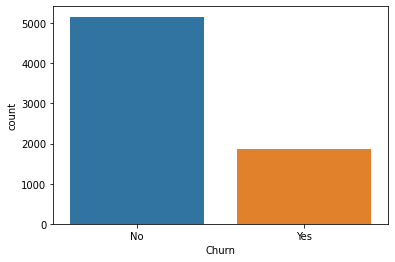

In [ ]:
# Target variable, Churn 
sns.countplot(x=telco_df['Churn'])

In [ ]:
# Normalise can be set to True to print proportions instead of number
telco_df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [ ]:
telco_df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**Insight**: Target Variable is highly imbalanced. 

### **Univariate Analysis**
**Categorical Indepedent Variable vs Target Variable**

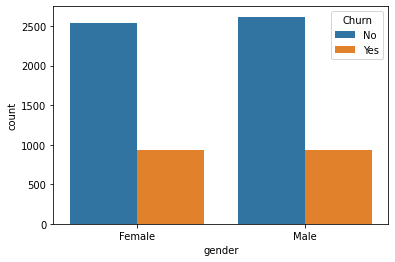

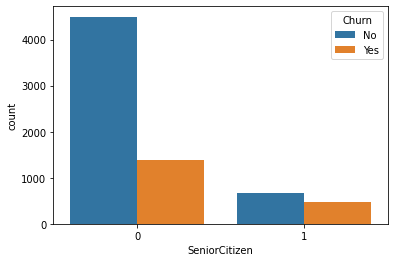

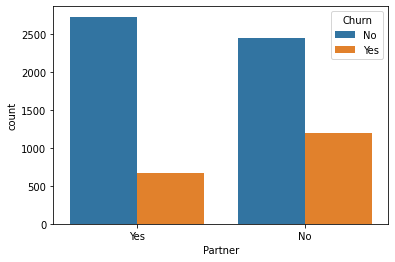

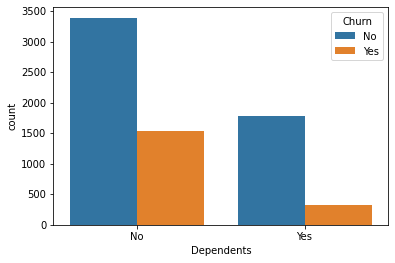

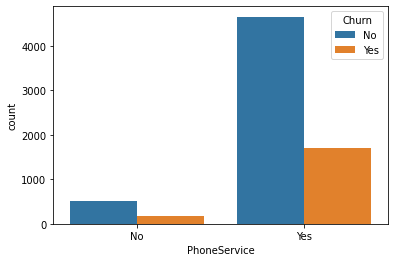

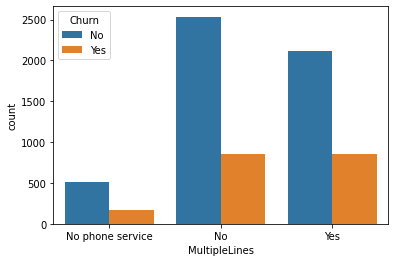

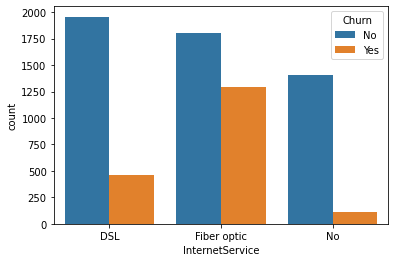

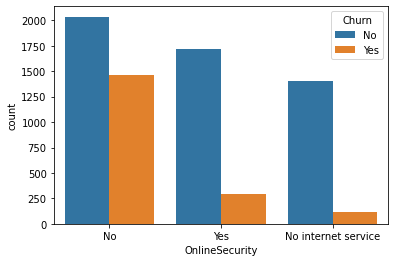

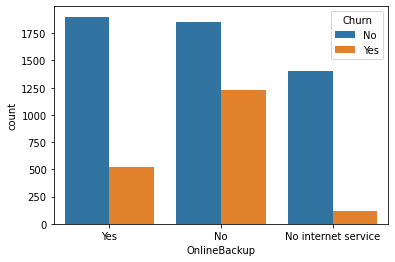

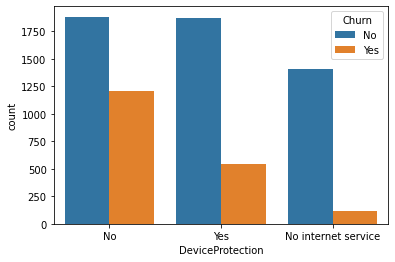

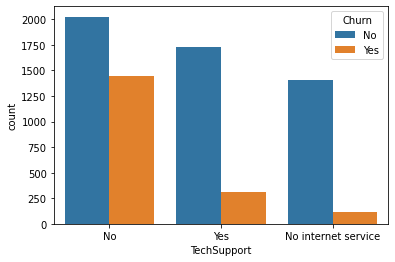

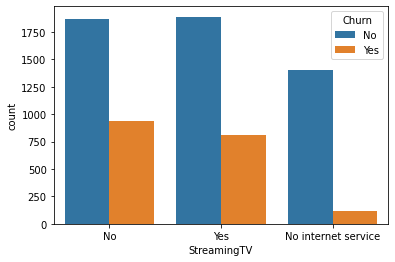

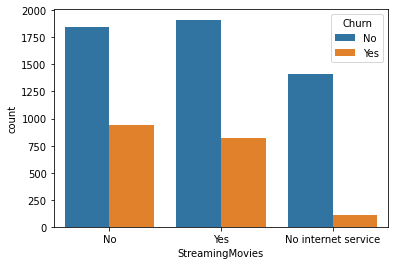

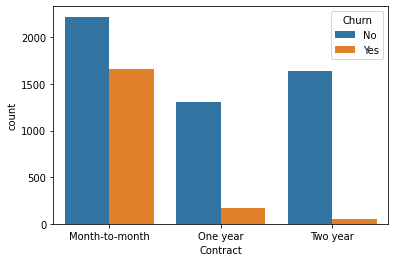

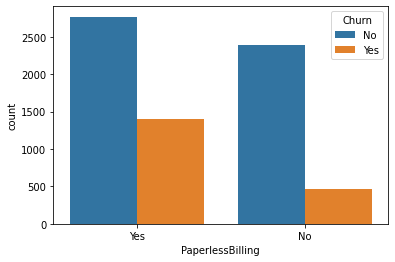

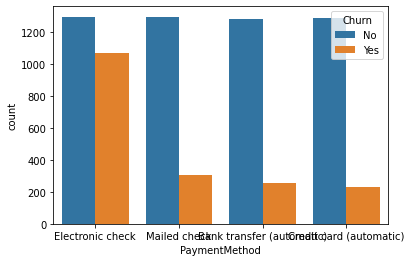

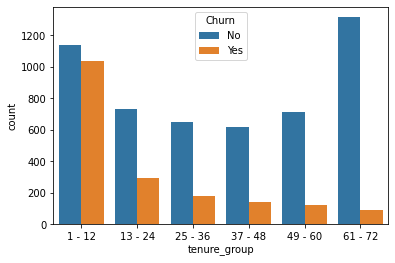

In [ ]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn')

**Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0**

In [ ]:
telco_df['Churn'] = np.where(telco_df.Churn == 'Yes',1,0)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**Convert all the categorical variables into dummy variables**

In [ ]:
telco_df_dummies = pd.get_dummies(telco_df)
telco_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**Relationship between Monthly Charges and Total Charges**

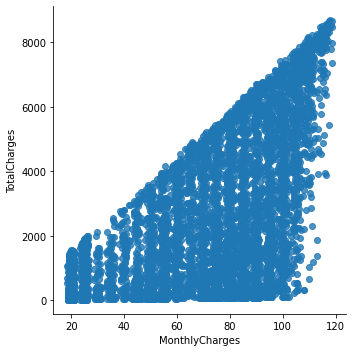

In [ ]:
sns.lmplot(data=telco_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

**Insight:** Total Charges increase as Monthly Charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

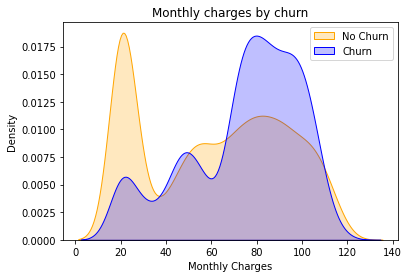

In [ ]:
Mth = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies["Churn"] == 0) ],
                color="Orange", shade = True)
Mth = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight**: Churn is high when monthly charges around USD70 to USD100. 

Text(0.5, 1.0, 'Total charges by churn')

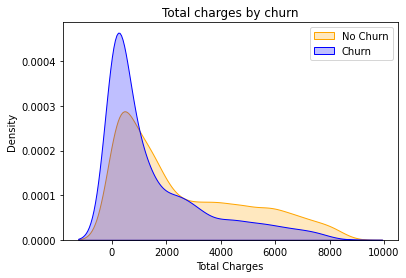

In [ ]:
Tot = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies["Churn"] == 0) ],
                color="Orange", shade = True)
Tot = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Insight**: Lower total charges led to higher churn. 

Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

**Build a corelation of all features with 'Churn'**

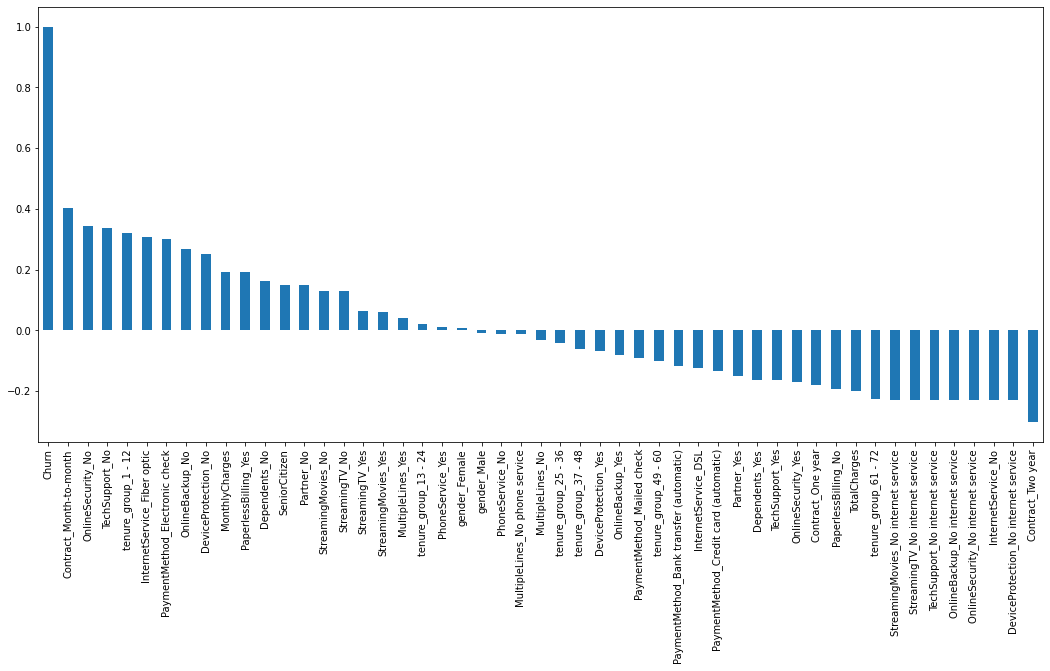

In [ ]:
plt.figure(figsize=(18,8))
telco_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Insights:**

**HIGH Churn** seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

**LOW Churn** is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have almost **NO impact on Churn**

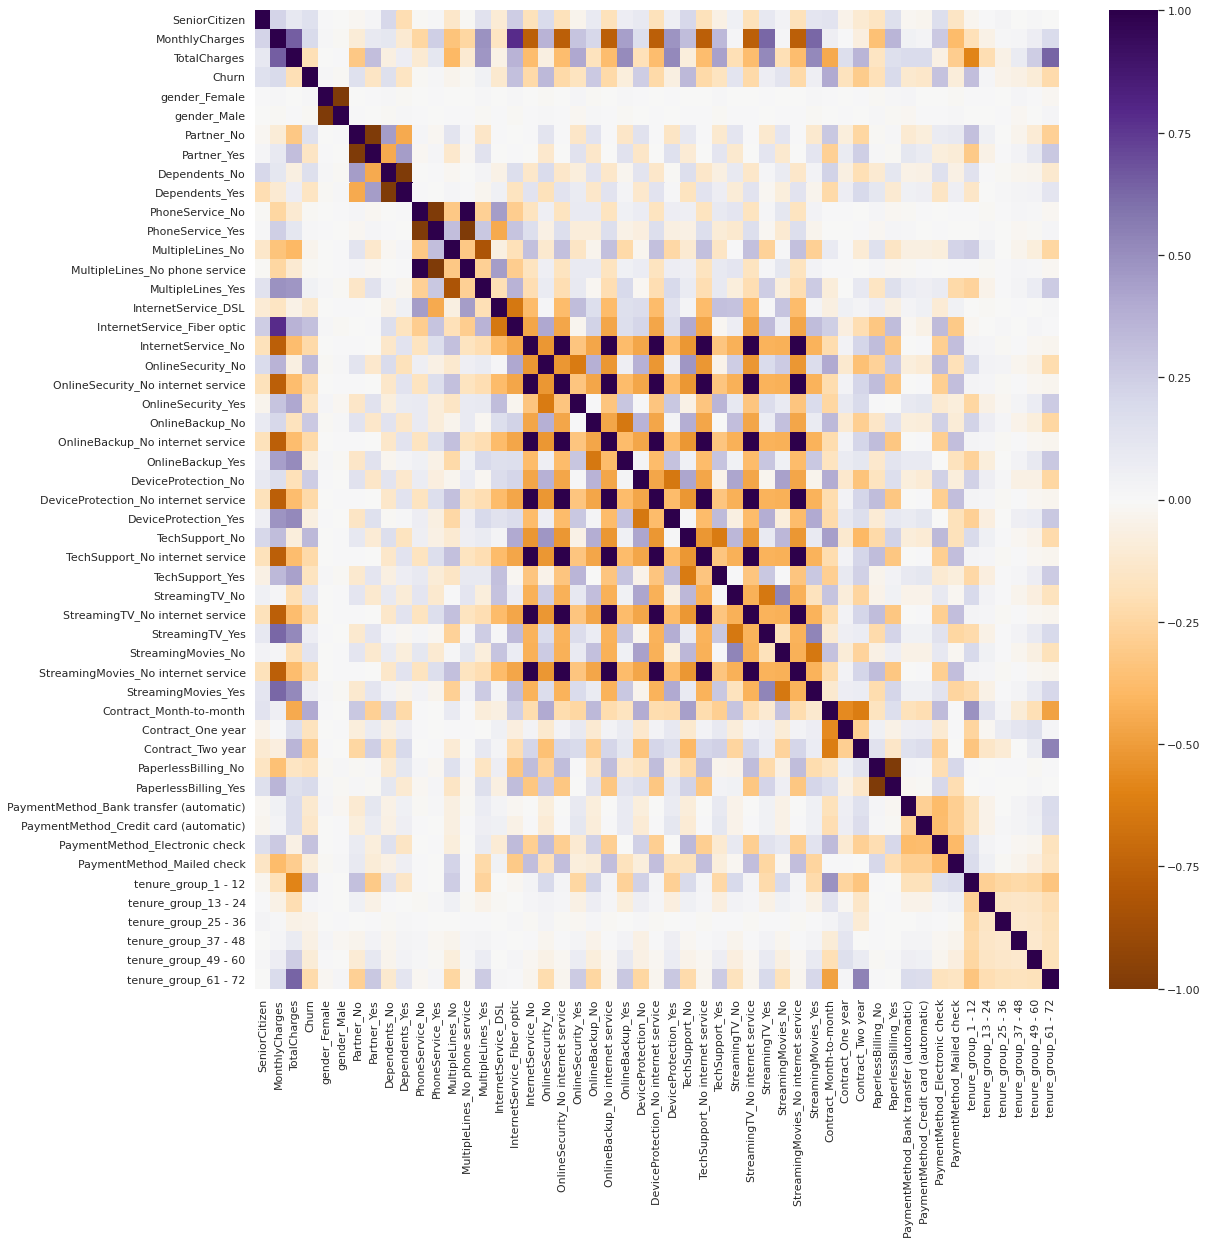

In [ ]:
sns.set(rc = {'figure.figsize': (18, 18)})
sns.heatmap(telco_df_dummies.corr(), cmap = 'PuOr');

**Bivariate Analysis**

In [ ]:
new_df1_target0=telco_df.loc[telco_df["Churn"]==0]
new_df1_target1=telco_df.loc[telco_df["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

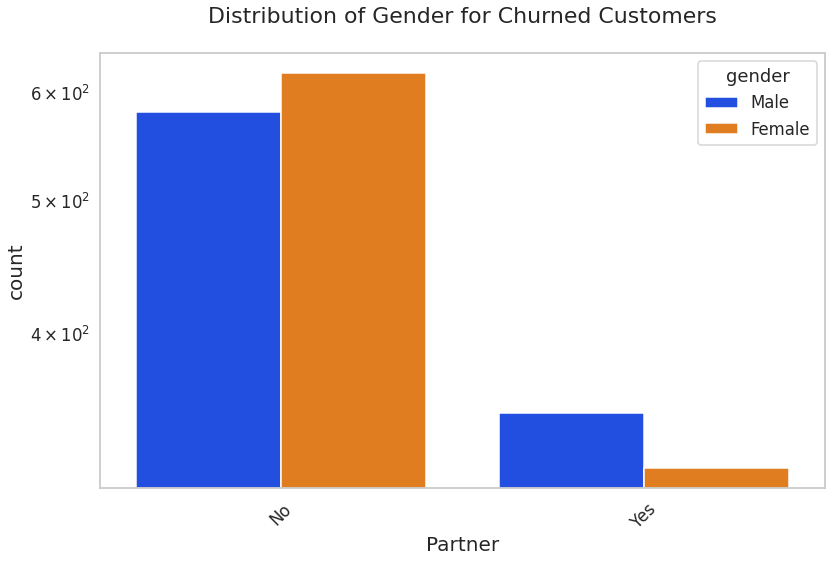

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

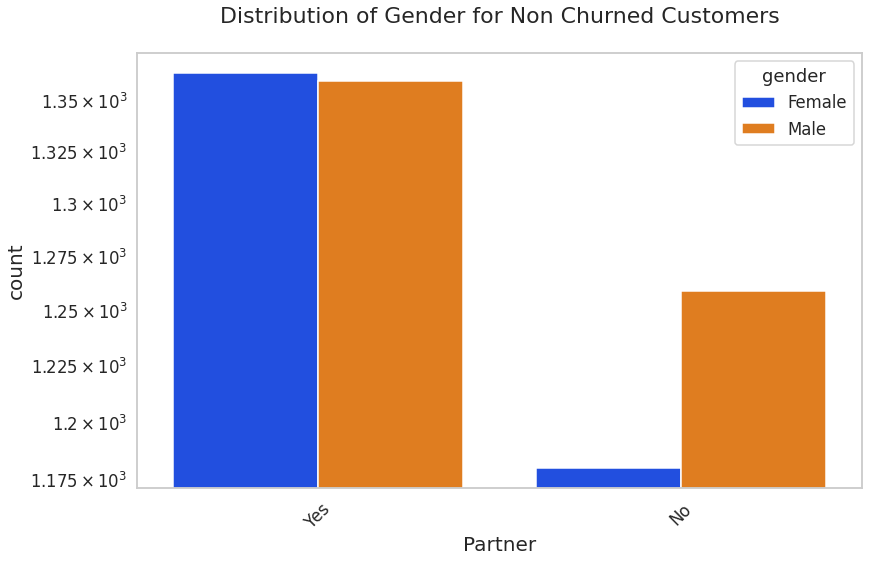

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

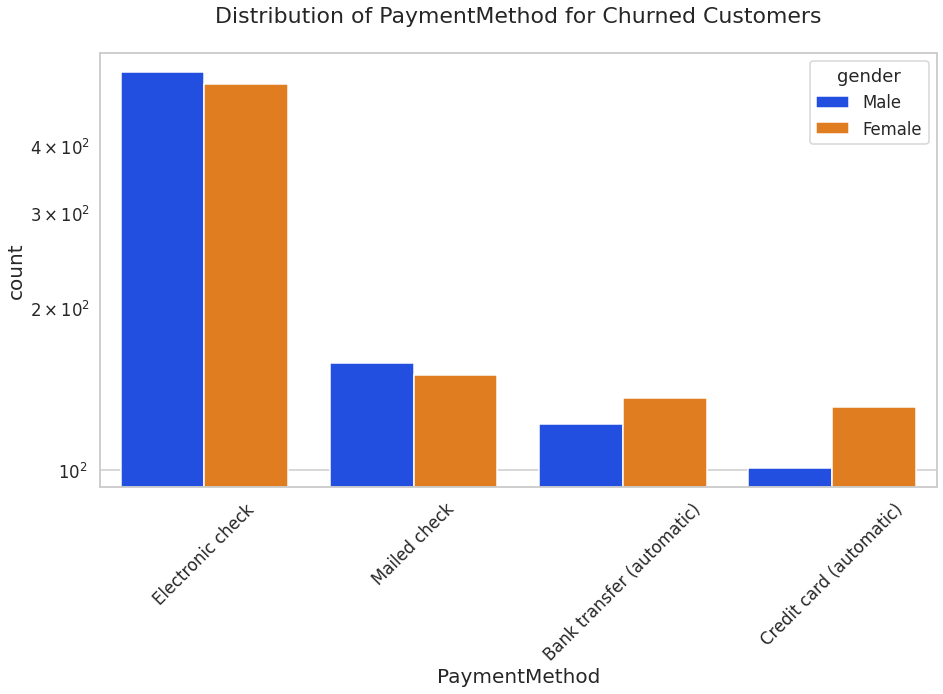

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

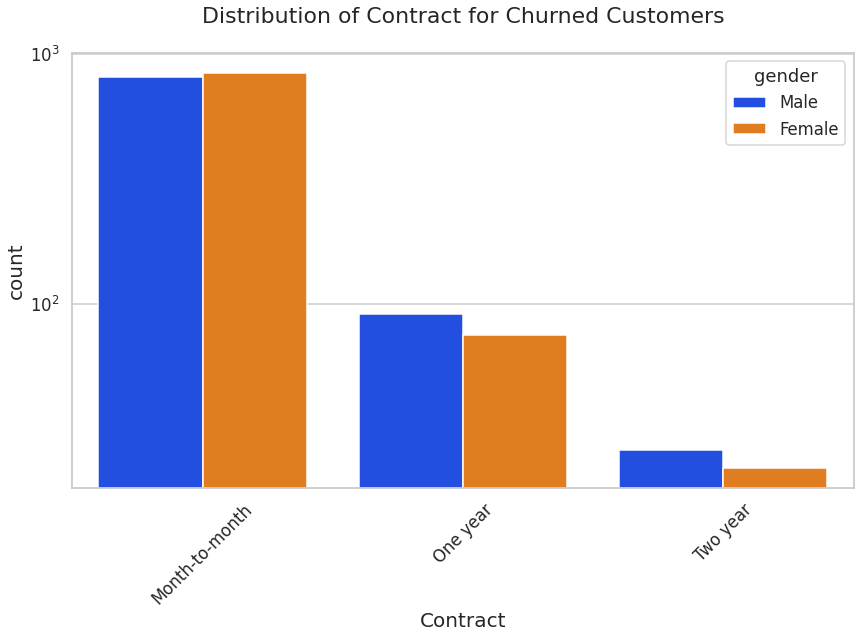

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

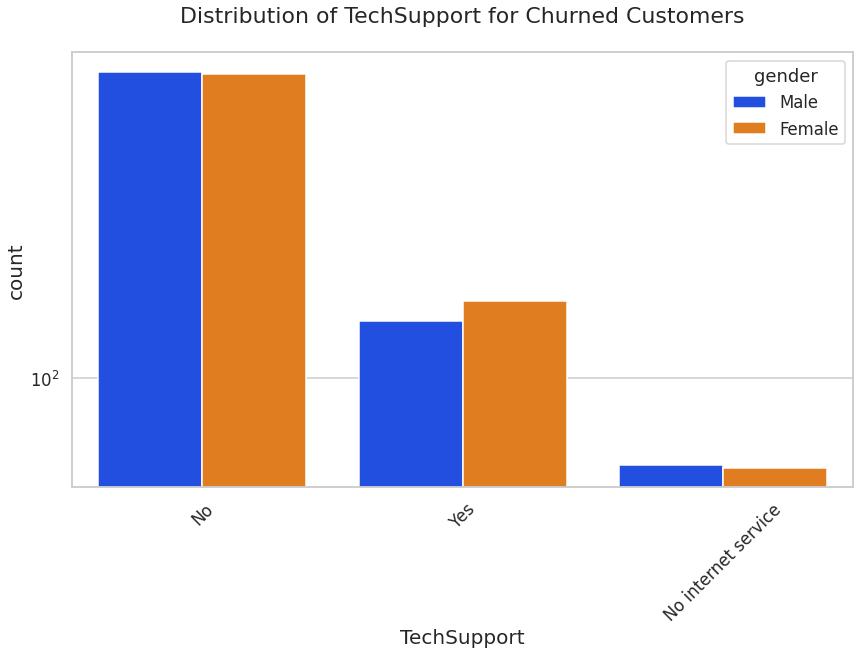

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

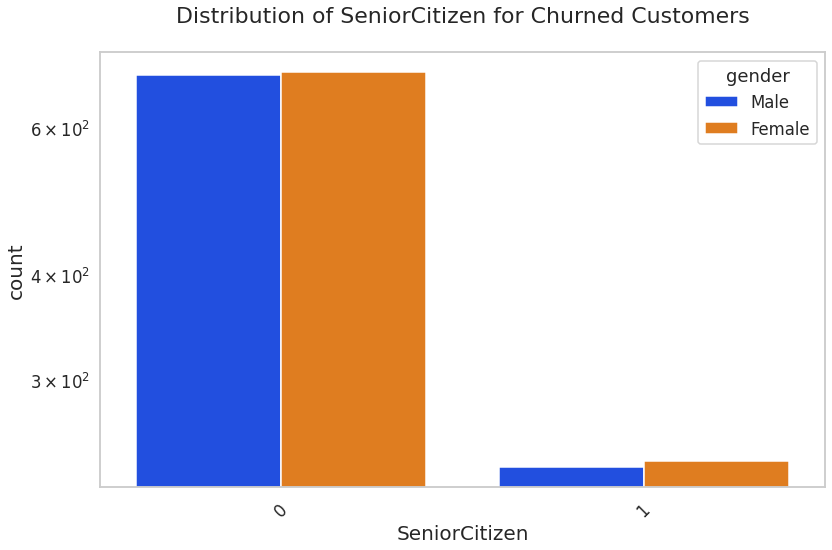

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

**Insights:**

Electronic check medium are the highest churners

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners

Non senior Citizens are high churners

## **Model Building**

In [ ]:
x=telco_df_dummies.drop('Churn', axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y=telco_df_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Decision Tree Classifier**

In [ ]:
# Import library
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree 

# Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train, y_train)

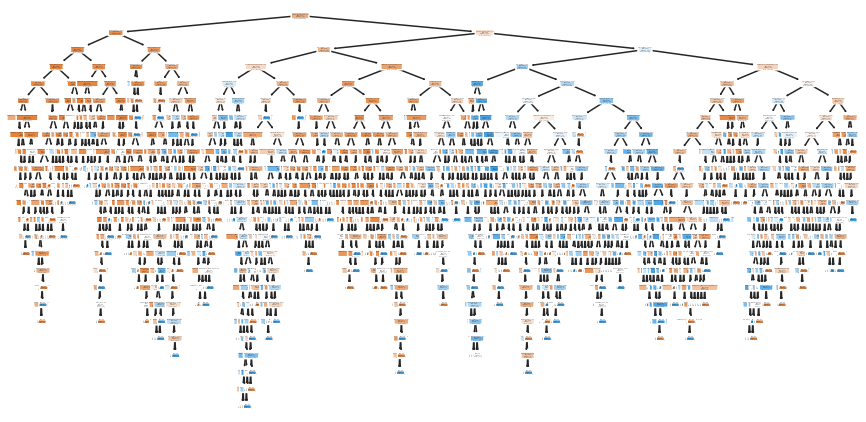

In [ ]:
# plot decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          feature_names= x.columns);

In [ ]:
y_pred = clf_dt.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[812 226]
 [167 202]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1038
           1       0.47      0.55      0.51       369

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.74      0.72      0.73      1407



Based on the report above, the accuracy is quite low as it is an imbalanced dataset. We shouldn't consider Accuracy as our metrics to measure model, as Accuracy is cursed in imbalanced datasets. 

We need to check recall, precision & f1-score for the miniority class. It shown that the recall, precision & f1-score are too low for Class 1 (ie. churned customers). 

**We will use SMOTEENN (UpSampling + ENN) to solve imbalanced dataset.**

In [ ]:
sm = SMOTEENN()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
# Create a decision tree and fit it to the training data
clf_dt_sm = DecisionTreeClassifier(random_state=42)
clf_dt_sm = clf_dt_sm.fit(x_train_sm, y_train_sm)

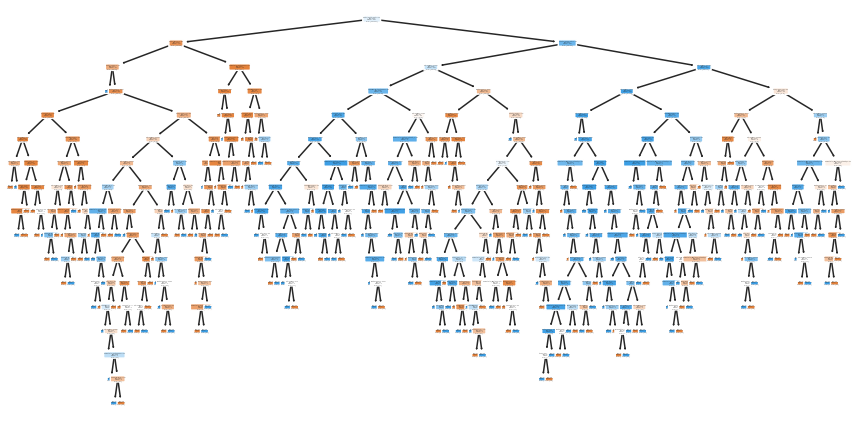

In [ ]:
# plot decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_sm,
          filled=True,
          rounded=True,
          feature_names= x.columns);

In [ ]:
y_pred = clf_dt_sm.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[793 245]
 [123 246]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1038
           1       0.50      0.67      0.57       369

    accuracy                           0.74      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.74      0.75      1407



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
clf_rf_sm = model_rf.fit(x_train_sm, y_train_sm)

In [ ]:
y_pred = clf_rf_sm.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[750 288]
 [ 71 298]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1038
           1       0.51      0.81      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.74      0.76      1407



**Bagging Classifier**

https://vitalflux.com/bagging-classifier-python-code-example/

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=5, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train_sm, y_train_sm)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=5, oob_score=True, random_state=0)

In [ ]:
print('Model test Score: %.3f, ' %bag_model.score(x_test, y_test),
      'Model training Score: %.3f' %bag_model.score(x_train_sm, y_train_sm))

Model test Score: 0.751,  Model training Score: 0.989


In [ ]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[750 288]
 [ 71 298]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1038
           1       0.51      0.81      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.74      0.76      1407



**Logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(x_train_sm, y_train_sm)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(x_train_sm, y_train_sm)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[834 204]
 [120 249]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1038
           1       0.55      0.67      0.61       369

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



**Feature importance based on Logistic Regression**

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train_sm.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

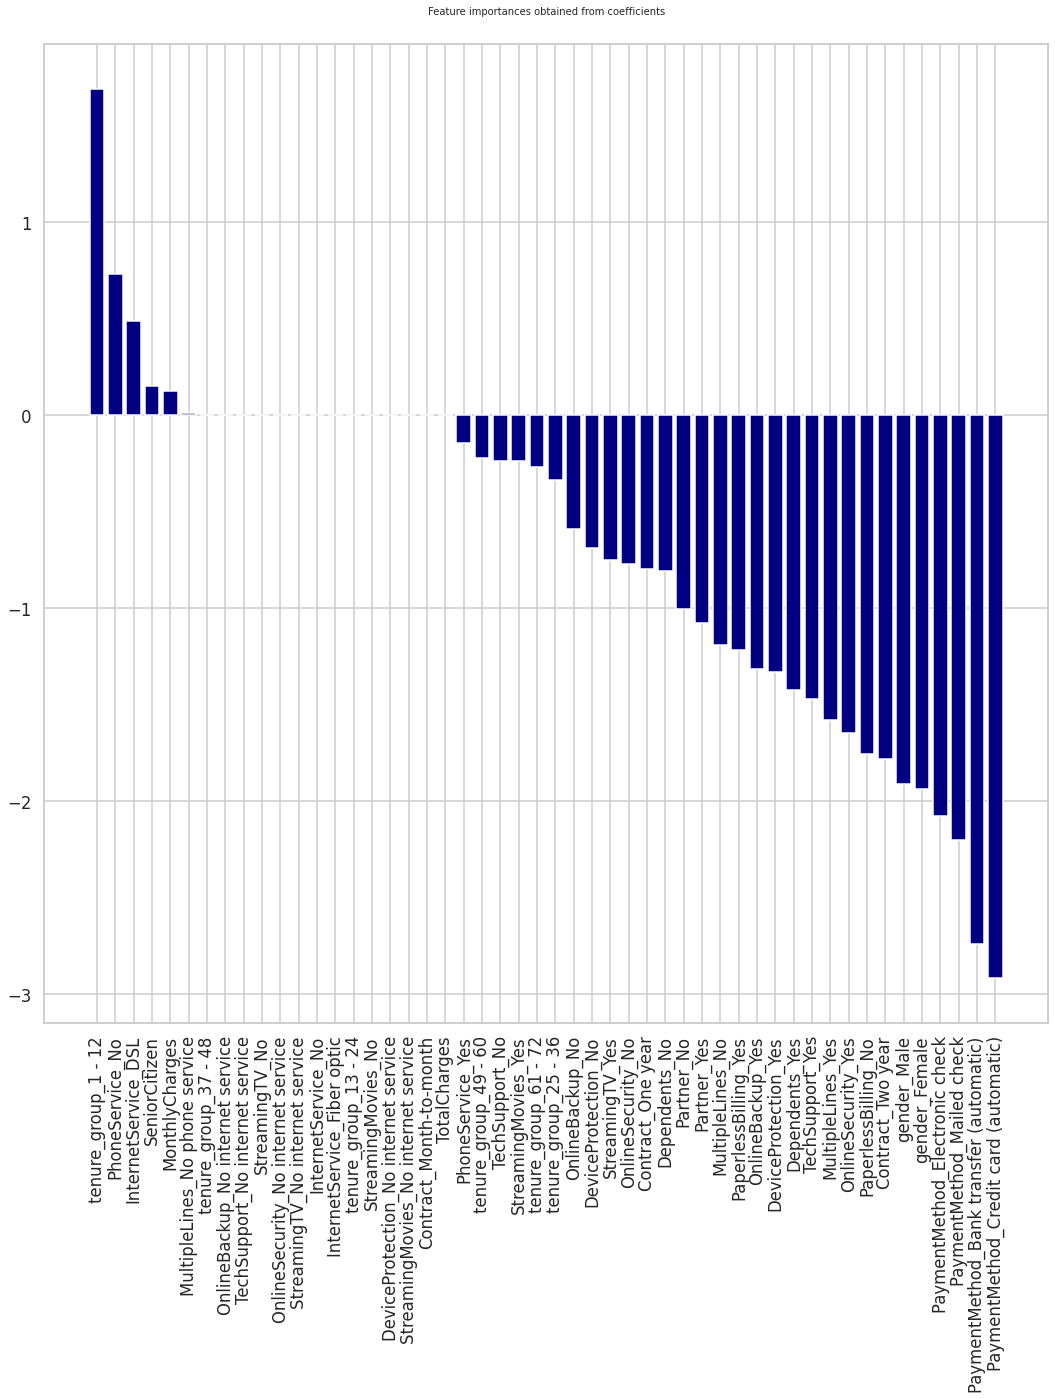

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#000080')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

References:

https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50

https://towardsdatascience.com/smote-fdce2f605729#:~:text=The%20SMOTE%20algorithm%20works%20as,point%20and%20the%20selected%20neighbor.

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

https://github.com/Swastik-25/Imbalanced-Data-with-SMOTE-Techniques/blob/main/Imbalanced_Data.ipynb

**Pickle the model**

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(bag_model,open(filename,'wb'))

Model will be saved.

To open the model file

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
print('Model test Score: %.3f, ' %bag_model.score(x_test, y_test),
      'Model training Score: %.3f' %bag_model.score(x_train_sm, y_train_sm))

Model test Score: 0.751,  Model training Score: 0.989
